# 🧠 NutriSmart AI – HU-06
## Exploración y Preprocesamiento de Datos
Este notebook contiene el Análisis Exploratorio de Datos (EDA) y el preprocesamiento del dataset `Moo2019-20_dailymetrics_database.csv` para el modelo de predicción de ganancia diaria de peso (ADG_INT).

In [2]:
# 📦 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 📥 Cargar dataset
file_path = '../data/Moo2019-20_dailymetrics_database.csv'  # Ajustar si es necesario
df = pd.read_csv(file_path)
df.head()

,Date,Month,DOY,Season,ADG_INT,BoutsPerDay,GBD_5min,GrazeMinutes,DayLengthMinutes,GrazeHrs_5min,...,Rest,Walk,Graze,Total,%Graze,%Rest,GrazeHrs_4sec,Bouts,GBD_4sec,Eartag
0,9/6/2019,9,249,2,1,5,130.596667,652.983333,1440.000000,10.883056,...,11428,668,9513,21609,44.0,52.9,10.6,601,63.3,242
1,9/6/2019,9,249,2,1,6,93.494444,570.966667,1440.000000,9.516111,...,11949,386,9287,21622,43.0,55.3,10.3,991,37.5,1037
2,9/6/2019,9,249,2,1,9,70.331481,637.983333,1440.000000,10.633056,...,10898,908,9805,21611,45.4,50.4,10.9,802,48.9,781
3,9/6/2019,9,249,2,1,5,106.596667,542.983333,1442.983333,9.031012,...,12128,1097,8400,21625,38.8,56.1,9.3,819,41.0,664
4,9/6/2019,9,249,2,1,4,125.241667,505.966667,1440.000000,8.432778,...,13016,771,7817,21604,36.2,60.2,8.7,581,53.8,796


## 📊 Análisis Exploratorio de Datos (EDA)
- Dimensiones del dataset
- Distribución de la variable objetivo `ADG_INT`
- Estadísticas descriptivas
- Correlaciones y visualizaciones

In [4]:
# 🔍 Dimensiones y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              644 non-null    object 
 1   Month             644 non-null    int64  
 2   DOY               644 non-null    int64  
 3   Season            644 non-null    int64  
 4   ADG_INT           644 non-null    int64  
 5   BoutsPerDay       644 non-null    int64  
 6   GBD_5min          644 non-null    float64
 7   GrazeMinutes      644 non-null    float64
 8   DayLengthMinutes  644 non-null    float64
 9   GrazeHrs_5min     644 non-null    float64
 10  MeanTA            644 non-null    float64
 11  MeanVelo          644 non-null    float64
 12  MoonitorID        644 non-null    int64  
 13  Pasture           644 non-null    object 
 14  Year              644 non-null    int64  
 15  Biomass           644 non-null    float64
 16  Week              636 non-null    float64
 1

In [5]:
# 📈 Descripción estadística
df.describe()

,Month,DOY,Season,ADG_INT,BoutsPerDay,GBD_5min,GrazeMinutes,DayLengthMinutes,GrazeHrs_5min,MeanTA,...,Rest,Walk,Graze,Total,%Graze,%Rest,GrazeHrs_4sec,Bouts,GBD_4sec,Eartag
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.00000,644.000000
mean,7.599379,218.307453,1.664596,2.804348,5.945652,122.867643,635.693167,1429.342520,10.674900,39.298810,...,11003.189441,927.267081,9680.402174,21610.858696,44.793012,50.913354,10.750621,867.596273,52.67500,666.149068
std,1.682699,50.909109,0.472498,1.528042,2.473844,48.657059,91.242599,17.158231,1.531745,9.460472,...,1396.143648,557.001082,1263.415158,17.736982,5.848664,6.457607,1.402702,384.987829,22.51387,231.628892
min,5.000000,136.000000,1.000000,1.000000,2.000000,32.703922,399.183333,1340.000000,6.746761,19.048673,...,6797.000000,119.000000,6483.000000,21546.000000,30.000000,31.400000,7.200000,256.000000,10.10000,178.000000
25%,6.000000,154.000000,1.000000,2.000000,4.000000,87.251687,572.691667,1424.999999,9.615661,32.424634,...,10166.000000,588.750000,8780.250000,21602.750000,40.600000,47.000000,9.700000,570.500000,36.10000,487.000000
50%,8.000000,243.000000,2.000000,2.000000,6.000000,113.370139,630.958332,1437.016667,10.566226,38.141940,...,11078.500000,782.000000,9634.000000,21611.000000,44.600000,51.300000,10.700000,772.500000,48.45000,675.000000
75%,9.000000,259.000000,2.000000,4.000000,7.000000,148.991667,688.712500,1440.000000,11.568241,44.775777,...,11975.500000,1106.250000,10474.750000,21620.000000,48.500000,55.425000,11.600000,1076.000000,65.30000,781.000000
max,10.000000,276.000000,2.000000,5.000000,17.000000,317.983333,952.983333,1445.000000,15.850218,84.804787,...,14368.000000,5218.000000,13445.000000,21675.000000,62.200000,66.500000,14.900000,2683.000000,172.30000,1195.000000


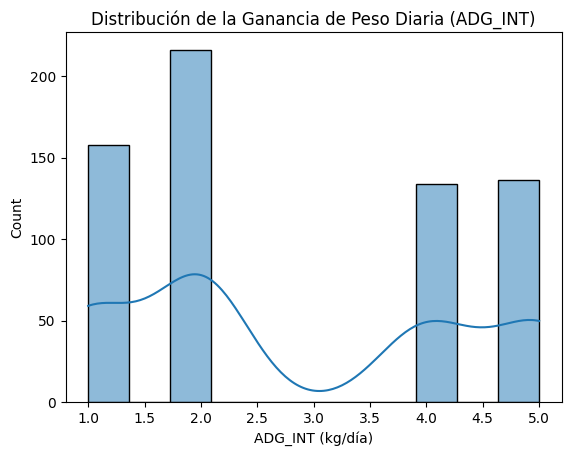

In [6]:
# 🎯 Distribución de la variable objetivo
sns.histplot(df['ADG_INT'], kde=True)
plt.title('Distribución de la Ganancia de Peso Diaria (ADG_INT)')
plt.xlabel('ADG_INT (kg/día)')
plt.show()

In [7]:
print(df.columns.tolist())


['Date', 'Month', 'DOY', 'Season', 'ADG_INT', 'BoutsPerDay', 'GBD_5min', 'GrazeMinutes', 'DayLengthMinutes', 'GrazeHrs_5min', 'MeanTA', 'MeanVelo', 'MoonitorID', 'Pasture', 'Year', 'Biomass', 'Week', 'Deployment', 'RFID', 'Rest', 'Walk', 'Graze', 'Total', '%Graze', '%Rest', 'GrazeHrs_4sec', 'Bouts', 'GBD_4sec', 'Eartag']


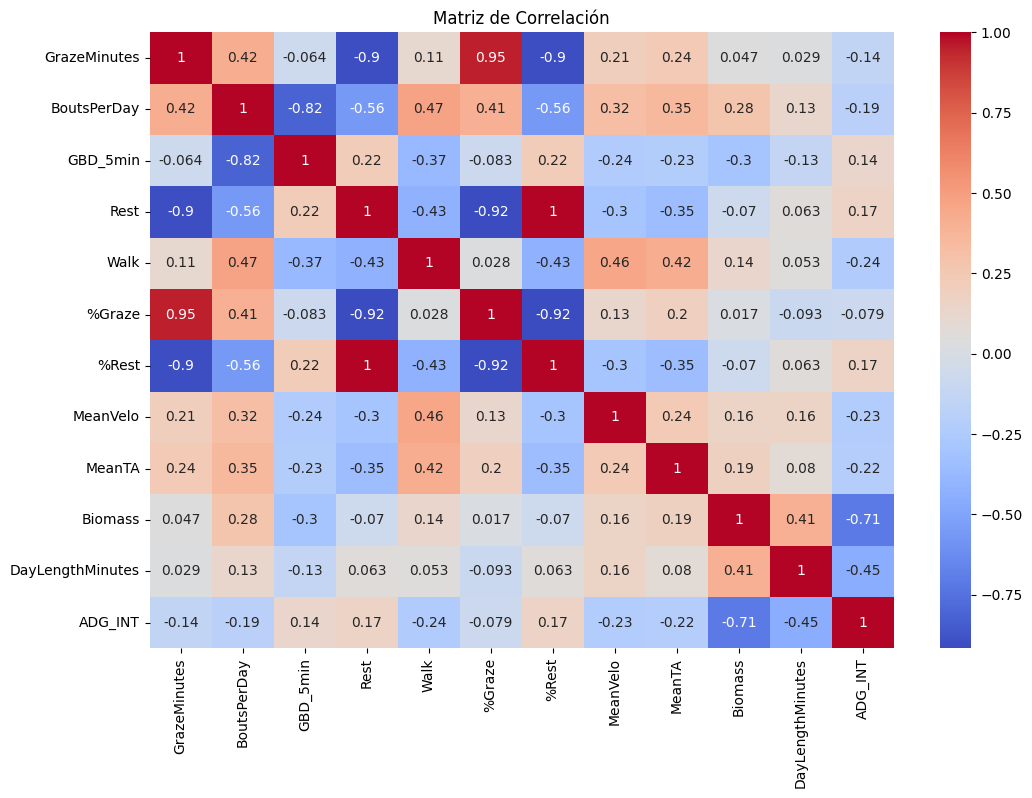

In [8]:
# 🔗 Correlaciones entre variables seleccionadas

features = [
    'GrazeMinutes',      # Tiempo pastando
    'BoutsPerDay',      # Conteo, número de ventos de alimentación
    'GBD_5min',         # Duración media por sesión de alimentación
    'Rest',              # Tiempo en reposo
    'Walk',             # Indicador indirecto de búsqueda de alimento y esfuerzo
    '%Graze',           # Normaliza GrazeMinutes respecto a duración total del día
    '%Rest',            # Normaliza el reposo diario
    'MeanVelo',          # Velocidad promedio
    'MeanTA',            # Temperatura ambiente
    'Biomass',           # Biomasa estimada
    'DayLengthMinutes',  # Tiempo efectivo disponible para pastar
    'ADG_INT'            # Variable objetivo
]

plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## 🧹 Preprocesamiento de Datos
- Selección de variables
- Eliminación de valores nulos
- Normalización Min-Max

In [9]:
# 📌 Selección de variables relevantes
selected_features = [
    'Rest',              # Tiempo en reposo
    'Walk',              # Indicador indirecto de búsqueda de alimento y esfuerzo
    'GBD_5min',          # Duración media por sesión de alimentación
    'MeanVelo',          # Velocidad promedio
    'MeanTA',            # Temperatura ambiente
    'Biomass',           # Biomasa estimada
    'DayLengthMinutes',  # Tiempo efectivo disponible para pastar
]
X = df[selected_features]
y = df['ADG_INT']

In [10]:
# ❌ Eliminación de filas con valores nulos
X = X.dropna()
y = y[X.index]  # Alinear los índices

In [11]:
# 🔄 Normalización Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# 📂 División Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((515, 7), (129, 7))

In [13]:
# Guardar conjuntos de entrenamiento y prueba en la carpeta /data

pd.DataFrame(X_train).to_csv('../data/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('../data/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('../data/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('../data/y_test.csv', index=False)


In [14]:
# Guardar el MinMaxScaler utilizado

import joblib
import os

# Crear carpeta models/ si no existe
os.makedirs('../models', exist_ok=True)

# Guardar el objeto MinMaxScaler en formato .pkl
joblib.dump(scaler, '../models/escalador_minmax.pkl')

print("✅ Escalador guardado correctamente en '../models/escalador_minmax.pkl'")


✅ Escalador guardado correctamente en '../models/escalador_minmax.pkl'


✅ Dataset listo para entrenamiento del modelo de red neuronal (MLP)